# Quick Start With HuggingFace
- GitHub: https://github.com/haotian-liu/LLaVA?tab=readme-ov-file#fine-tuning-with-local-gpus
- HuggingFace: https://huggingface.co/docs/transformers/model_doc/llava

In [ ]:
!pip install -q transformers==4.36.0
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.8 MB/s eta 0:00:00


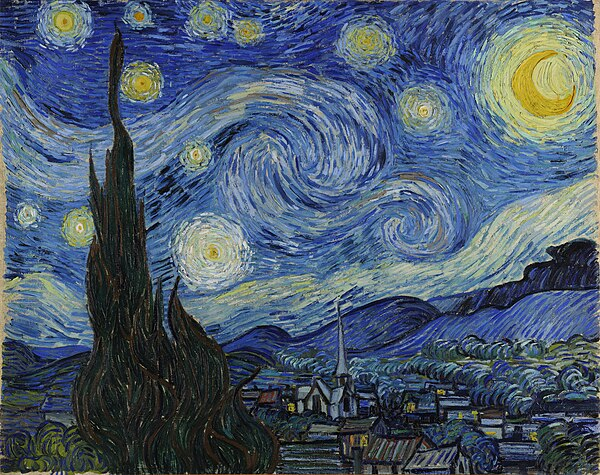

In [ ]:
import requests
from PIL import Image

# 이 이미지 가져오는 코드 가끔 에러남 -> UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x782ed57e3650>
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/600px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

In [ ]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-13b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/77.2k [00:00<?, ?B/s]

model-00001-of-00006.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00006.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00003-of-00006.safetensors:   0%|          | 0.00/4.88G [00:00<?, ?B/s]

model-00004-of-00006.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00006.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00006-of-00006.safetensors:   0%|          | 0.00/2.02G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

## 단어만 뽑은 버전

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Just pick 3 WORDs\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Just pick 3 WORDs
ASSISTANT: Starry night, mountain, city


## 단어 + 간략한 설명

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Starry night sky (1) - The night sky is filled with stars, creating a captivating and serene atmosphere.
2. Mountain range (2) - The mountain range in the background adds depth and beauty to the scene, providing a sense of scale and grandeur.
3. Town (3) - The town in the foreground adds a sense of human presence and contrasts with the vastness of the night sky and mountain range.


# 문제점 (1): 위키피디아에서 이미지를 불러올 때 가끔 발생하는 오류

In [ ]:
import requests
from PIL import Image

image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Meisje_met_de_parel.jpg/600px-Meisje_met_de_parel.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x782db402ff60>

# 다른 그림으로 진행 (1) 다른 유명한 명작: 진주 귀고리를 한 소녀 (요하네스 페르메이르)

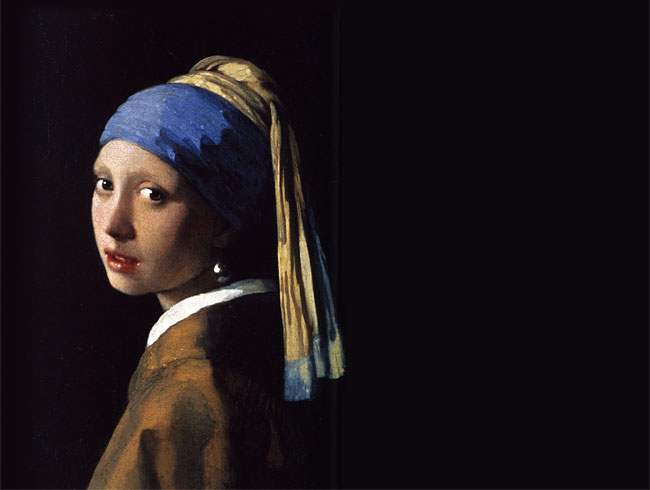

In [ ]:
import requests
from PIL import Image

image_url = "https://www.newsearth.kr/news/photo/202005/290_530_396.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Woman: The main subject of the image is a woman, who is wearing a blue headscarf and a brown dress.
2. Painting: The image is a painting, which is a form of artwork created using various techniques and materials.
3. Scarf: The woman is wearing a scarf, which is a piece of clothing that is typically worn around the neck and shoulders.


# 문제점 (2)

이 작품에서는 '진주' 혹은 '귀걸이'를 뽑아야함.  
3번째로 뽑은 '스카프'에서도 머리에 맸는데, 목과 어깨에 맸다고 설명함... -> 작품에 기본적인 설명을 주고, 그 설명에서 뽑아야하려나

# 다른 그림으로 진행 (2) 신인 작가의 정보가 많이 없는 작품: 휴가 (송지호)

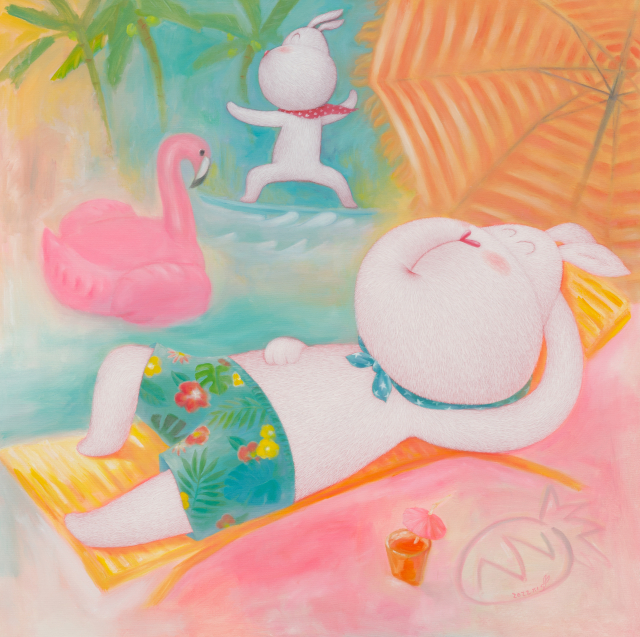

In [ ]:
import requests
from PIL import Image

image_url = "https://www.artmusee.com/_images/artwork/640/test_20240116_H9G1K0EF8YJ0I580.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Pink flamingo - The flamingo is a prominent and colorful object in the picture, adding a vibrant touch to the scene.
2. White rabbit - The rabbit is the main subject of the image, lying on a beach chair and enjoying a relaxing moment.
3. Pink beach - The beach is painted in a pink hue, creating a unique and eye-catching backdrop for the scene.


# 다른 그림으로 진행 (3) 신인 작가의 정보가 많이 없는 작품: Pollen, 녹청자를 품다 (이성미)

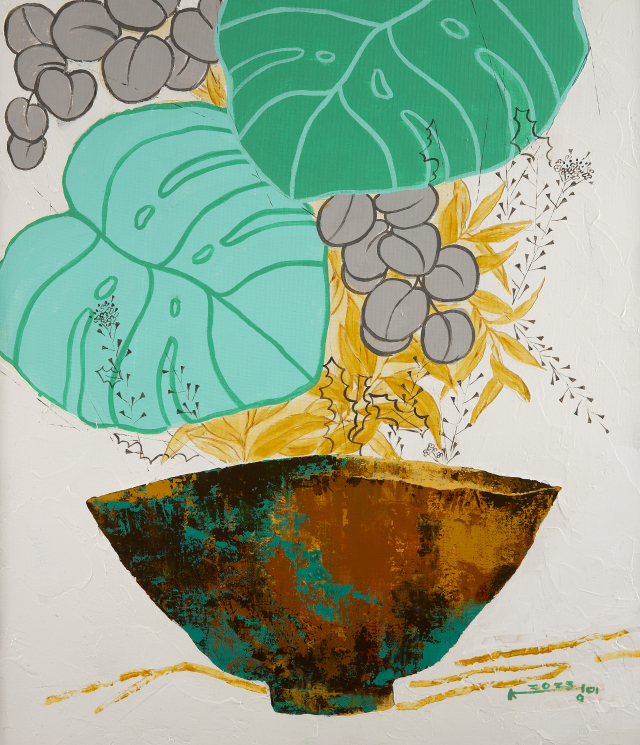

In [ ]:
image_url = "https://www.artmusee.com/_images/artwork/640/test_20240117_5M24GL78ZQ0804UU.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [ ]:
prompt = "USER: <image>\nWhat are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. \nASSISTANT:\n"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 500})

In [ ]:
print(outputs[0]["generated_text"])

USER:  
What are the main objects in this picture? Pick 3 keywords that impress you and number each word and reason you choose them. 
ASSISTANT:
1. Bowl: The bowl is the central object in the picture, and it is filled with various fruits and vegetables. It is a large, brown bowl that stands out against the white background.
2. Grapes: The grapes are a prominent feature in the image, with several bunches of grapes scattered throughout the scene. They add a pop of color and a sense of abundance to the picture.
3. Leaves: The leaves are another key element in the picture, with several large leaves surrounding the bowl and the grapes. They provide a natural and organic touch to the composition, creating a sense of freshness and vitality.
